In [34]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras import models
from keras import regularizers
import joblib
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping

In [35]:
DATASET_PATH = 'dataset_020/color_dataset_concat.csv'
MODEL_PATH = os.path.join('MODEL', 'color_model.keras')
SCALER_PATH = os.path.join('MODEL', 'color_scaler.pkl')

In [36]:
# Load the dataset
df = pd.read_csv(DATASET_PATH)

X = df[['R', 'G', 'B', 'W']]
y = df['control_value']

In [37]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, SCALER_PATH)

['MODEL\\color_scaler.pkl']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
inputs = layers.Input(shape=(4,))
reshaped_inputs = layers.Reshape((4, 1))(inputs)

# Architecture
# CNN branch
conv1 = layers.Conv1D(64, kernel_size=2, activation='relu')(reshaped_inputs)
conv2 = layers.Conv1D(128, kernel_size=2, activation='relu')(conv1)
flattened = layers.Flatten()(conv2)

# Fully connected branch
fc = layers.Dense(256, activation='relu')(inputs)
fc = layers.Dense(256, activation='relu')(fc)

# Combine CNN and FC branches
combined = layers.concatenate([flattened, fc])

# Final dense layers
combined = layers.Dense(512, activation='relu')(combined)
combined = layers.Dense(128, activation='relu')(combined)
combined = layers.Dense(32, activation='relu')(combined)
output = layers.Dense(1)(combined)

model =[]
# Create hybrid model
model = models.Model(inputs=inputs, outputs=output)


# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.00001), metrics=['mae', 'mse'])

In [40]:
# Create early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, verbose=1, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/200
998/998 [==============================] - 7s 6ms/step - loss: 0.1236 - mae: 0.2777 - mse: 0.1236 - val_loss: 0.0469 - val_mae: 0.1756 - val_mse: 0.0469
Epoch 2/200
998/998 [==============================] - 5s 5ms/step - loss: 0.0378 - mae: 0.1537 - mse: 0.0378 - val_loss: 0.0289 - val_mae: 0.1279 - val_mse: 0.0289
Epoch 3/200
998/998 [==============================] - 6s 6ms/step - loss: 0.0238 - mae: 0.1114 - mse: 0.0238 - val_loss: 0.0184 - val_mae: 0.0923 - val_mse: 0.0184
Epoch 4/200
998/998 [==============================] - 5s 5ms/step - loss: 0.0160 - mae: 0.0845 - mse: 0.0160 - val_loss: 0.0128 - val_mae: 0.0720 - val_mse: 0.0128
Epoch 5/200
998/998 [==============================] - 6s 6ms/step - loss: 0.0116 - mae: 0.0683 - mse: 0.0116 - val_loss: 0.0093 - val_mae: 0.0601 - val_mse: 0.0093
Epoch 6/200
998/998 [==============================] - 5s 5ms/step - loss: 0.0084 - mae: 0.0561 - mse: 0.0084 - val_loss: 0.0067 - val_mae: 0.0491 - val_mse: 0.0067
Epoch 7/20

In [49]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

125/125 - 0s - loss: 7.6696e-05 - mae: 0.0062 - mse: 7.6696e-05 - 228ms/epoch - 2ms/step


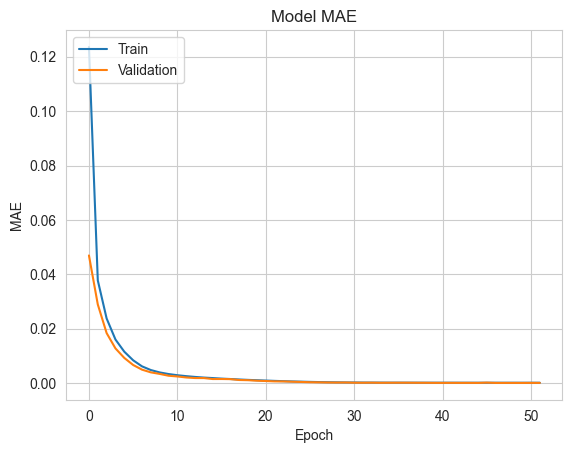

In [50]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

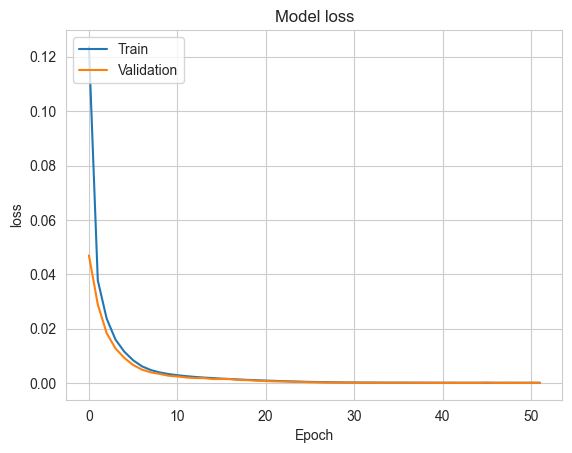

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
model.save(MODEL_PATH)

In [53]:
# Use the model for prediction
predictions = model.predict(X_test)

125/125 [==============================] - 0s 2ms/step


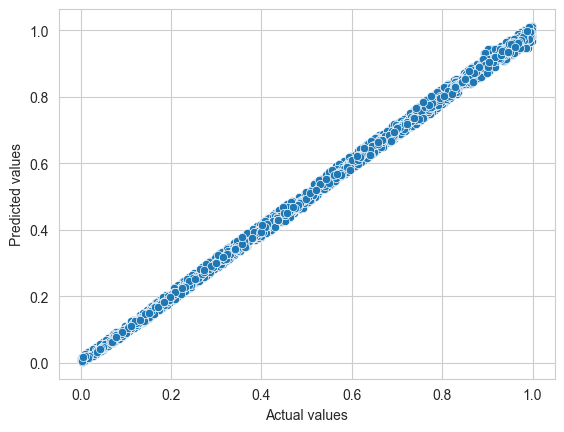

In [54]:
# Plot the predictions against the actual values
sns.scatterplot(x=y_test, y=predictions.flatten())
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


In [55]:
X_train.shape[1]

4

## Test Predictions on test dataset

Best Prediction Errors:
Index: 3407, Absolute Error: 3.2877922057084064e-07
Index: 2565, Absolute Error: 6.396293640187345e-06
Index: 219, Absolute Error: 7.36021995545455e-06
Index: 1150, Absolute Error: 7.894307374953224e-06
Index: 195, Absolute Error: 8.000791072840241e-06
Index: 212, Absolute Error: 9.154438972466816e-06
Index: 3352, Absolute Error: 1.1211633682228772e-05
Index: 1593, Absolute Error: 1.247286796568492e-05
Index: 2467, Absolute Error: 1.2942552566508336e-05
Index: 1172, Absolute Error: 1.3298273086548296e-05

Worst Prediction Errors:
Index: 2568, Absolute Error: 0.0232582621574402
Index: 933, Absolute Error: 0.023277882575988784
Index: 1378, Absolute Error: 0.023307139873504634
Index: 570, Absolute Error: 0.023337541103363058
Index: 2273, Absolute Error: 0.02335779905319213
Index: 2148, Absolute Error: 0.02342933750152587
Index: 2845, Absolute Error: 0.023460423469543468
Index: 1036, Absolute Error: 0.023487835884094255
Index: 3635, Absolute Error: 0.023496742010116

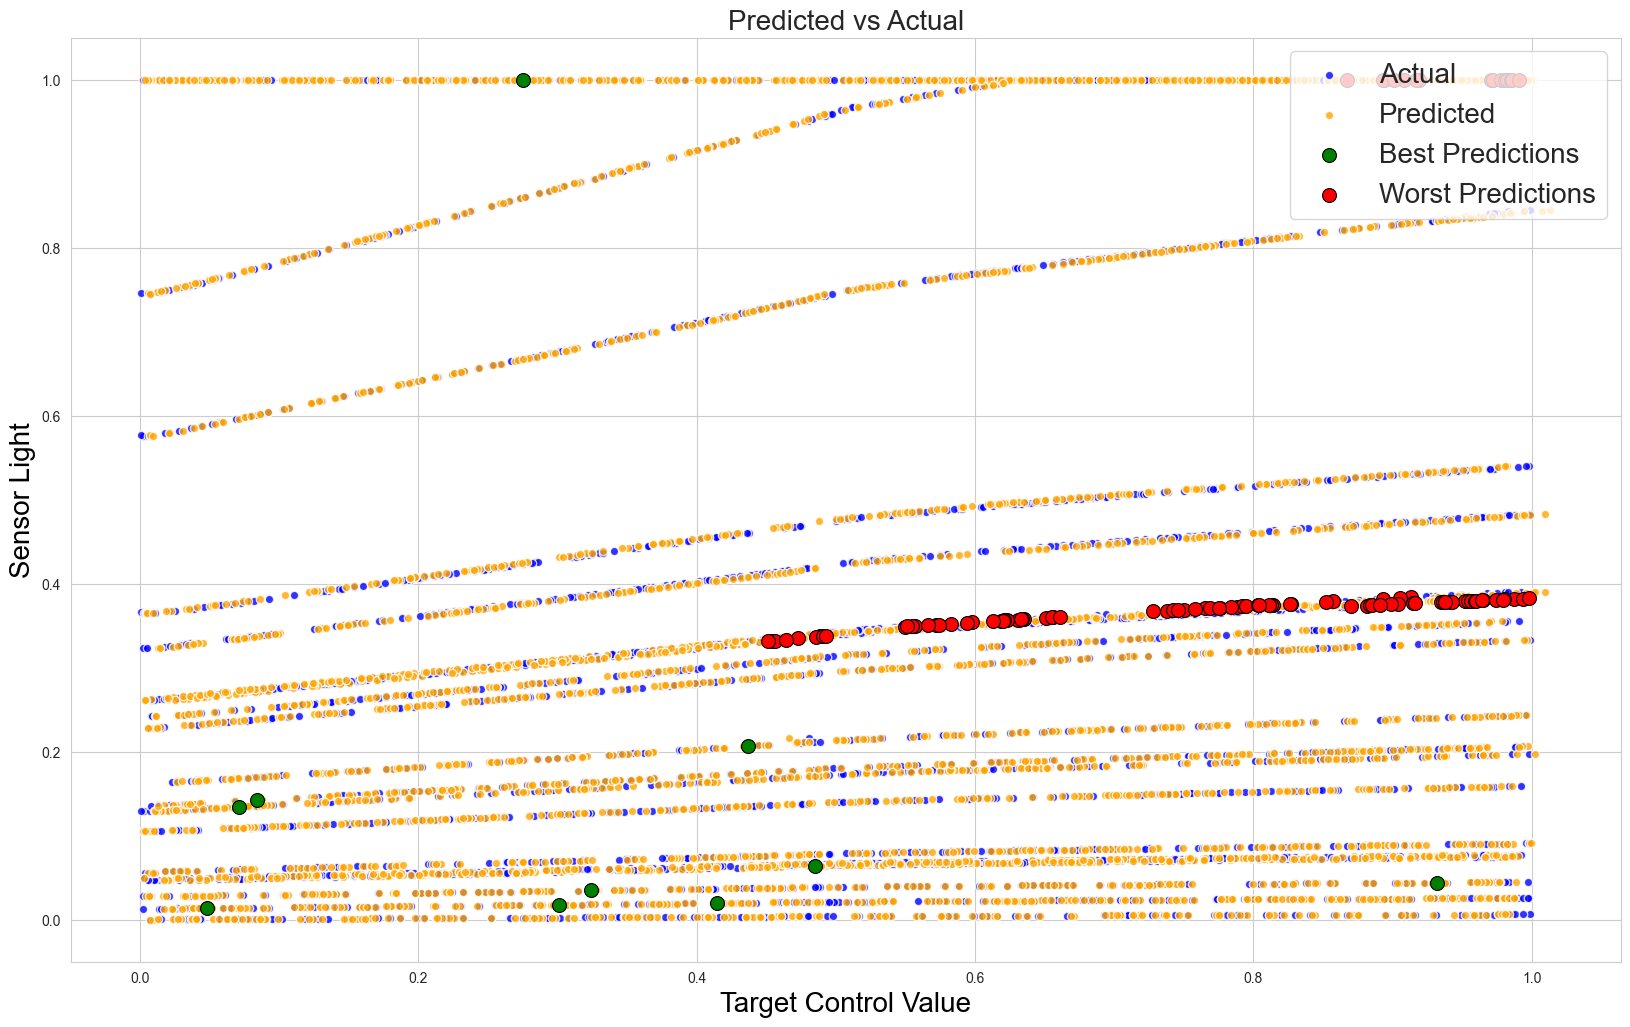

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index of y_test to allow direct indexing after the train-test split
y_test = y_test.reset_index(drop=True)

# Calculate prediction errors
errors = predictions.flatten() - y_test

# Get the indices of the best and worst predictions
best_pred_indices = np.argsort(np.abs(errors))[:10]  # Indices of the 10 best predictions
worst_pred_indices = np.argsort(np.abs(errors))[-100:]  # Indices of the 10 worst predictions



absolute_errors = np.abs(errors)

best_pred_errors = absolute_errors.iloc[best_pred_indices]
worst_pred_errors = absolute_errors.iloc[worst_pred_indices]

print("Best Prediction Errors:")
for i, index in enumerate(best_pred_indices):
    print(f"Index: {index}, Absolute Error: {best_pred_errors.iloc[i]}")

print("\nWorst Prediction Errors:")
for i, index in enumerate(worst_pred_indices):
    print(f"Index: {index}, Absolute Error: {worst_pred_errors.iloc[i]}")
    



# Adjust your slicing here, if necessary
slice_min = 0
slice_max = len(y_test)  
col_slice = 3  # The feature  to plot


sns.set_style("whitegrid")
plt.figure(figsize=(20,12))
plt.title("Predicted vs Actual", fontsize=20)

sns.scatterplot(x=y_test[slice_min:slice_max], y=X_test[slice_min:slice_max, col_slice], color="blue", label="Actual", linewidth=1, alpha=0.8)
sns.scatterplot(x=predictions.flatten()[slice_min:slice_max], y=X_test[slice_min:slice_max, col_slice], color="orange", label="Predicted", linewidth=1, alpha=0.8)

# Highlight the best predictions
sns.scatterplot(x=y_test[best_pred_indices], y=X_test[best_pred_indices, col_slice], color="green", label="Best Predictions", s=100, edgecolor='black')

# Highlight the worst predictions
sns.scatterplot(x=y_test[worst_pred_indices], y=X_test[worst_pred_indices, col_slice], color="red", label="Worst Predictions", s=100, edgecolor='black')


plt.xlabel('Target Control Value', color='black', fontsize=20)
plt.ylabel('Sensor Light', color='black', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()


## Test Predictions on a new dataset

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test_file = "dataset\\test_file.txt"

# Reset the index of y_test to allow direct indexing after the train-test split
y_test = test_file

# Calculate prediction errors
errors = predictions.flatten() - y_test

# Get the indices of the best and worst predictions
best_pred_indices = np.argsort(np.abs(errors))[:10]  # Indices of the 10 best predictions
worst_pred_indices = np.argsort(np.abs(errors))[-100:]  # Indices of the 10 worst predictions



absolute_errors = np.abs(errors)

best_pred_errors = absolute_errors.iloc[best_pred_indices]
worst_pred_errors = absolute_errors.iloc[worst_pred_indices]

print("Best Prediction Errors:")
for i, index in enumerate(best_pred_indices):
    print(f"Index: {index}, Absolute Error: {best_pred_errors.iloc[i]}")

print("\nWorst Prediction Errors:")
for i, index in enumerate(worst_pred_indices):
    print(f"Index: {index}, Absolute Error: {worst_pred_errors.iloc[i]}")
    



# Adjust your slicing here, if necessary
slice_min = 0
slice_max = len(y_test)  
col_slice = 3  # The feature  to plot


sns.set_style("whitegrid")
plt.figure(figsize=(20,12))
plt.title("Predicted vs Actual", fontsize=20)

sns.scatterplot(x=y_test[slice_min:slice_max], y=X_test[slice_min:slice_max, col_slice], color="blue", label="Actual", linewidth=1, alpha=0.8)
sns.scatterplot(x=predictions.flatten()[slice_min:slice_max], y=X_test[slice_min:slice_max, col_slice], color="orange", label="Predicted", linewidth=1, alpha=0.8)

# Highlight the best predictions
sns.scatterplot(x=y_test[best_pred_indices], y=X_test[best_pred_indices, col_slice], color="green", label="Best Predictions", s=100, edgecolor='black')

# Highlight the worst predictions
sns.scatterplot(x=y_test[worst_pred_indices], y=X_test[worst_pred_indices, col_slice], color="red", label="Worst Predictions", s=100, edgecolor='black')


plt.xlabel('Target Control Value', color='black', fontsize=20)
plt.ylabel('Sensor Light', color='black', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()
